In [1]:
# Importing the libraries
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv('dataset.csv')

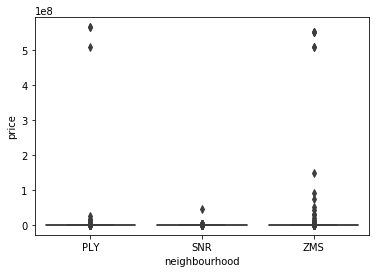

In [3]:
ax = sns.boxplot(x="neighbourhood", y="price", data=dataset)

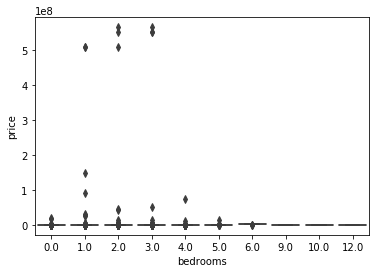

In [4]:
ax = sns.boxplot(x="bedrooms", y="price", data=dataset)

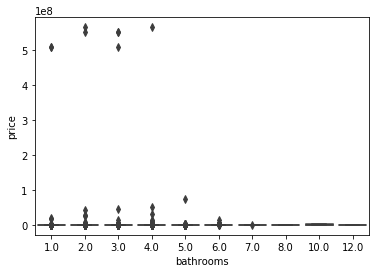

In [5]:
ax = sns.boxplot(x="bathrooms", y="price", data=dataset)

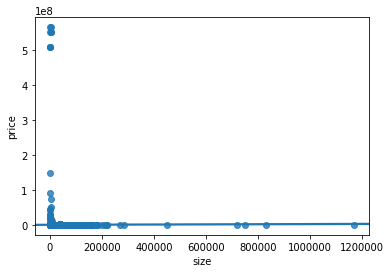

In [6]:
ax = sns.regplot(x="size", y="price", data=dataset)

In [7]:
# Removing flag column 'building'
dataset = dataset[['neighbourhood','price','size','bedrooms','bathrooms']]

In [8]:
# Taking care of missing data
#dataset = dataset.dropna()
dataset = dataset.fillna(dataset.mean())

In [9]:
# Removing the outliers
q = dataset["price"].quantile(0.98)
dataset=dataset[dataset["price"] < q]
q = dataset["size"].quantile(0.98)
dataset=dataset[dataset["size"] < q]
q = dataset["bedrooms"].quantile(0.98)
dataset=dataset[dataset["bedrooms"] < q]
q = dataset["bathrooms"].quantile(0.98)
dataset=dataset[dataset["bathrooms"] < q]

In [10]:
# Removing unlogical values  price <= 0 and size <=0
dataset=dataset.loc[dataset['bedrooms'] >= 0]
dataset=dataset.loc[dataset['bathrooms'] >= 0]
dataset=dataset.loc[dataset['size'] > 0]
dataset=dataset.loc[dataset['price'] > 0]

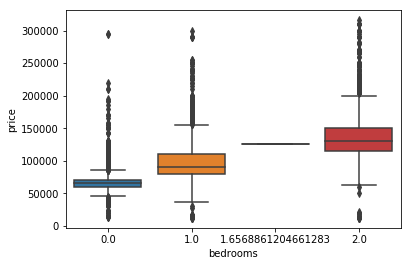

In [11]:
ax = sns.boxplot(x="bedrooms", y="price", data=dataset)

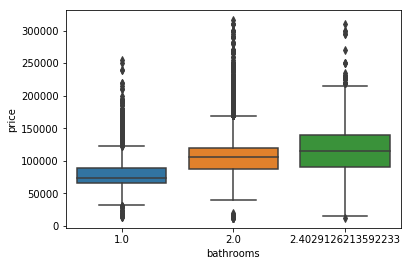

In [12]:
ax = sns.boxplot(x="bathrooms", y="price", data=dataset)

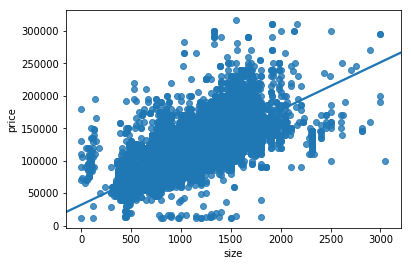

In [13]:
ax = sns.regplot(x="size", y="price", data=dataset)

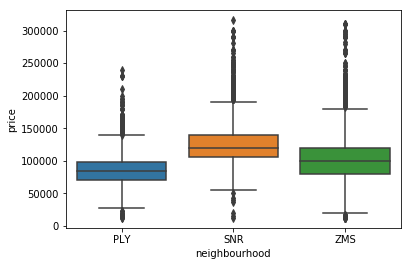

In [14]:
ax = sns.boxplot(x="neighbourhood", y="price", data=dataset)

In [15]:
# Encoding the Independent Variable
cols_to_transform = ['neighbourhood']
dataset = pd.get_dummies( columns = cols_to_transform ,data=dataset)

In [16]:
# Avoiding the Dummy Variable Trap
dataset = dataset[['neighbourhood_SNR','neighbourhood_ZMS','size','bedrooms','bathrooms','price']]
dataset.to_csv('example.csv',index=False)

In [17]:
dataset.corr()

,neighbourhood_SNR,neighbourhood_ZMS,size,bedrooms,bathrooms,price
neighbourhood_SNR,1.000000,-0.335309,0.250051,0.120670,0.127021,0.260720
neighbourhood_ZMS,-0.335309,1.000000,0.038299,0.110505,0.059391,0.182992
size,0.250051,0.038299,1.000000,0.823498,0.560202,0.771848
bedrooms,0.120670,0.110505,0.823498,1.000000,0.609287,0.695148
bathrooms,0.127021,0.059391,0.560202,0.609287,1.000000,0.458484
price,0.260720,0.182992,0.771848,0.695148,0.458484,1.000000


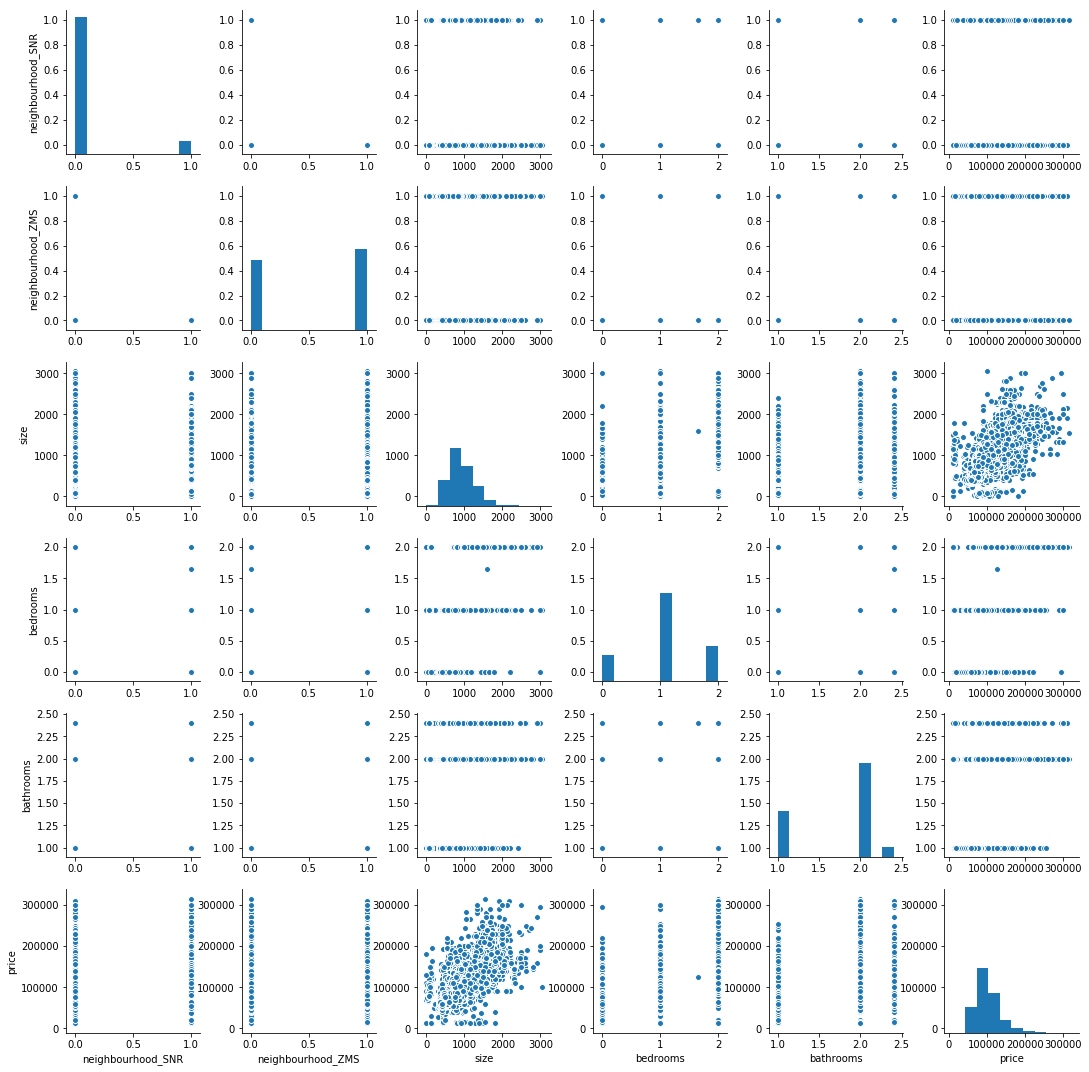

In [18]:
sns.pairplot(dataset)

In [19]:
# Splitting the dataset into features and label
# Stepwise regression #1
columns = ['size']
labels = dataset['price'].values
features = dataset[list(columns)].values

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20)

In [21]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
regressor.intercept_,regressor.coef_

(32075.012679788575, array([73.05061812]))

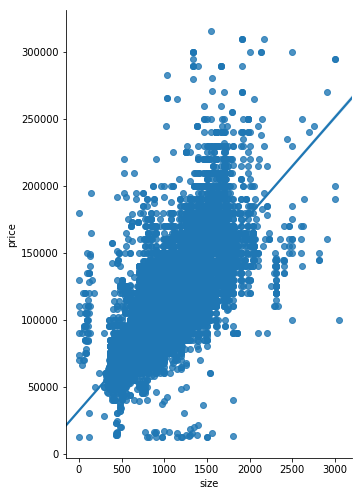

In [23]:
sns.pairplot(dataset, x_vars=['size'], y_vars='price', size=7, aspect=0.7, kind='reg')

In [24]:
regressor.score(X_test,y_test)

0.5913712934917748

In [25]:
# Splitting the dataset into features and label
# Stepwise regression #2
columns = ['size','bedrooms']
labels = dataset['price'].values
features = dataset[list(columns)].values

In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20)

In [27]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
regressor.intercept_,regressor.coef_

(35974.58849329817, array([  58.32422089, 9241.9084982 ]))

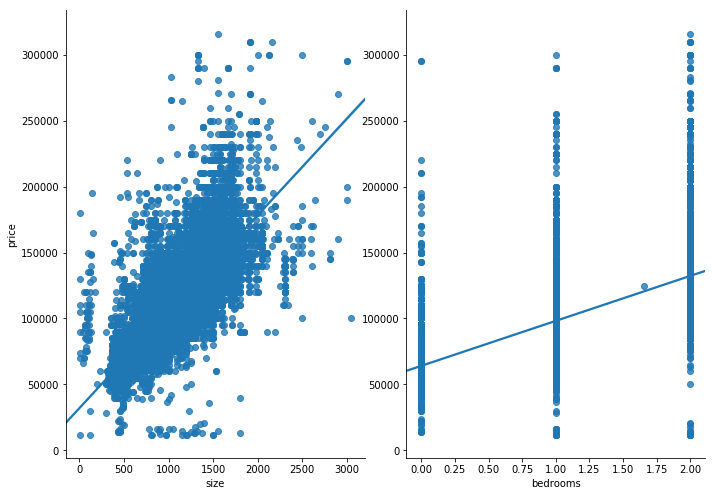

In [29]:
sns.pairplot(dataset, x_vars=['size','bedrooms'], y_vars='price', size=7, aspect=0.7, kind='reg')

In [30]:
regressor.score(X_test,y_test)

0.5950221582560616

In [31]:
# Splitting the dataset into features and label
# Stepwise regression #3
columns = ['size','bedrooms','bathrooms']
labels = dataset['price'].values
features = dataset[list(columns)].values

In [32]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20)

In [33]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
regressor.intercept_,regressor.coef_

(36148.61609906348, array([  58.3553979 , 9329.46231681,  -92.04561416]))

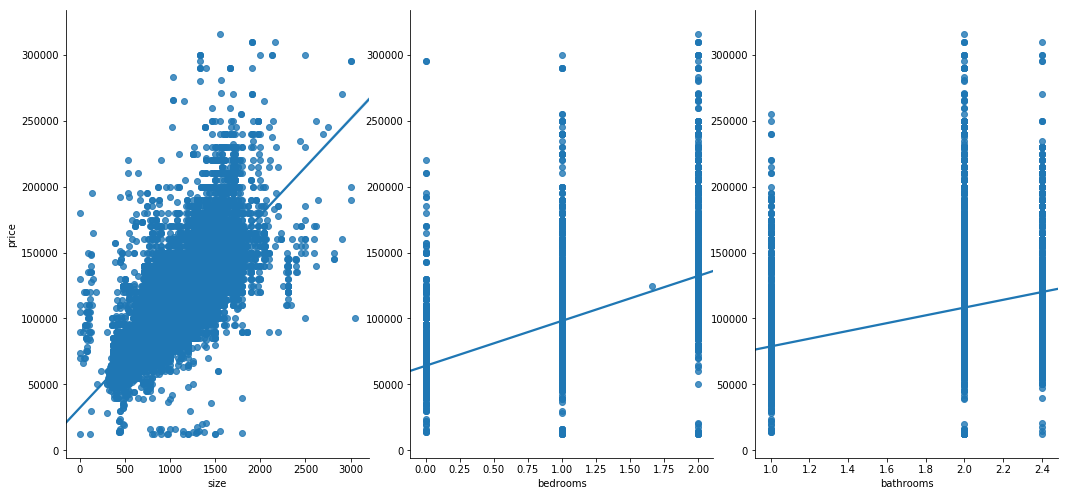

In [35]:
sns.pairplot(dataset, x_vars=['size','bedrooms','bathrooms'], y_vars='price', size=7, aspect=0.7, kind='reg')

In [36]:
regressor.score(X_test,y_test)

0.615271164261521

In [37]:
# Splitting the dataset into features and label
# Stepwise regression #4
columns = ['neighbourhood_SNR','neighbourhood_ZMS','size','bedrooms','bathrooms']
labels = dataset['price'].values
features = dataset[list(columns)].values

In [38]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20)

In [39]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
regressor.intercept_,regressor.coef_

(32217.150139518053,
 array([17998.6952147 , 12264.66927877,    55.26465935,  8887.53511281,
         -633.33319175]))

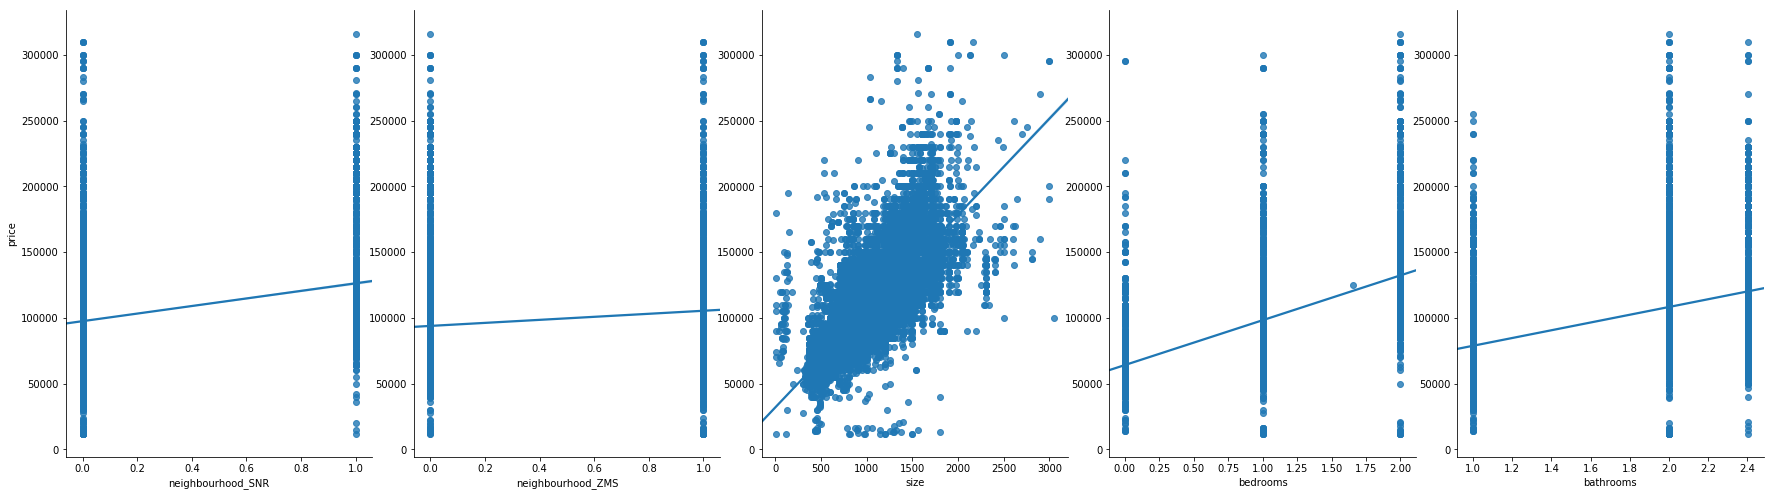

In [41]:
sns.pairplot(dataset, x_vars=['neighbourhood_SNR','neighbourhood_ZMS','size','bedrooms','bathrooms'], y_vars='price', size=7, aspect=0.7, kind='reg')

In [42]:
regressor.score(X_test,y_test)

0.6423294105551967

In [43]:
#Features to be 'neighbourhood_SNR','neighbourhood_ZMS','size','bedrooms','bathrooms' to predict the apartment price 

In [44]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

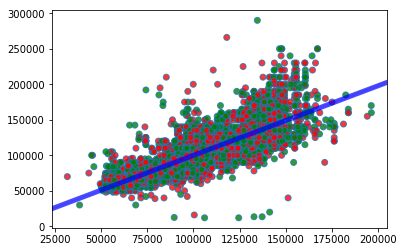

In [45]:
ax = sns.regplot(x=y_pred, y=y_test, data=dataset,scatter_kws={"facecolors":['red','green']},line_kws={"color":"b","alpha":0.7,"lw":5})

In [46]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)

In [47]:
accuracies.mean()

0.6475216325839637

In [48]:
accuracies.std()

0.013694989467843472